# Some modeling and threshold testing 

In [1]:
# Standard imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

import sklearn.pipeline
import sklearn.grid_search
import sklearn

%matplotlib inline

In [2]:
data = pd.read_csv('data/loans_toy.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887350 entries, 0 to 887349
Data columns (total 34 columns):
Unnamed: 0                       887350 non-null int64
annual_inc                       887350 non-null float64
dti                              887350 non-null float64
pub_rec                          887350 non-null float64
loan_amnt                        887350 non-null float64
binary_profit_loss               887350 non-null int64
profit_loss                      887350 non-null float64
earliest_cr_line_month           887350 non-null float64
earliest_cr_line_year            887350 non-null float64
issue_d_month                    887350 non-null int64
issue_d_year                     887350 non-null int64
home_ownership_MORTGAGE          887350 non-null int64
home_ownership_RENT              887350 non-null int64
home_ownership_OWN               887350 non-null int64
home_ownership_IS_OTHER_VALUE    887350 non-null int64
purpose_debt_consolidation       887350 non-null i

In [55]:
data.head()

,Unnamed: 0,annual_inc,dti,pub_rec,loan_amnt,binary_profit_loss,profit_loss,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,...,purpose_vacation,purpose_house,purpose_wedding,purpose_renewable_energy,purpose_educational,purpose_IS_OTHER_VALUE,is_joint,grade_num,sub_grade_num,term_num
0,0,24000.0,27.65,0.0,5000.0,1,861.071414,1.0,1985.0,12,...,0,0,0,0,0,0,0,1,1,36
1,1,30000.0,1.00,0.0,2500.0,0,-1491.290000,4.0,1999.0,12,...,0,0,0,0,0,0,0,2,2,60
2,2,12252.0,8.72,0.0,2400.0,1,603.653644,11.0,2001.0,12,...,0,0,0,0,0,0,0,2,2,36
3,3,49200.0,20.00,0.0,10000.0,1,2226.302212,2.0,1996.0,12,...,0,0,0,0,0,0,0,2,2,36
4,4,80000.0,17.94,0.0,3000.0,1,242.170000,1.0,1996.0,12,...,0,0,0,0,0,0,0,1,1,60


# Subset data so i can test quickly

In [4]:
data_sub = data[:50000]

## write to sql

In [10]:
import pandas.io.sql as pd_sql
import sqlite3 as sql

con = sql.connect("data/loans_toy.sqlite")
pd_sql.to_sql(data_sub, "loans", con)

/Users/williamcosby/anaconda/envs/data/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.


In [65]:
data_sub.head(1)

,Unnamed: 0,annual_inc,dti,pub_rec,loan_amnt,binary_profit_loss,profit_loss,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,...,purpose_vacation,purpose_house,purpose_wedding,purpose_renewable_energy,purpose_educational,purpose_IS_OTHER_VALUE,is_joint,grade_num,sub_grade_num,term_num
0,0,24000.0,27.65,0.0,5000.0,1,861.071414,1.0,1985.0,12,...,0,0,0,0,0,0,0,1,1,36


In [10]:
y = data_sub['binary_profit_loss']
profit_loss = data_sub['profit_loss']


# data_sub_X = data_sub.drop('binary_profit_loss',axis=1)
# data_sub_X = data_sub_X.drop('profit_loss',axis=1)


In [66]:
data_sub.columns

Index([u'Unnamed: 0', u'annual_inc', u'dti', u'pub_rec', u'loan_amnt',
       u'binary_profit_loss', u'profit_loss', u'earliest_cr_line_month',
       u'earliest_cr_line_year', u'issue_d_month', u'issue_d_year',
       u'home_ownership_MORTGAGE', u'home_ownership_RENT',
       u'home_ownership_OWN', u'home_ownership_IS_OTHER_VALUE',
       u'purpose_debt_consolidation', u'purpose_credit_card',
       u'purpose_home_improvement', u'purpose_other',
       u'purpose_major_purchase', u'purpose_small_business', u'purpose_car',
       u'purpose_medical', u'purpose_moving', u'purpose_vacation',
       u'purpose_house', u'purpose_wedding', u'purpose_renewable_energy',
       u'purpose_educational', u'purpose_IS_OTHER_VALUE', u'is_joint',
       u'grade_num', u'sub_grade_num', u'term_num'],
      dtype='object')

In [11]:
X = data_sub[[u'Unnamed: 0', u'annual_inc', u'dti', u'pub_rec', u'loan_amnt', u'earliest_cr_line_month',
       u'earliest_cr_line_year', u'issue_d_month', u'issue_d_year',
       u'home_ownership_MORTGAGE', u'home_ownership_RENT',
       u'home_ownership_OWN', u'home_ownership_IS_OTHER_VALUE',
       u'purpose_debt_consolidation', u'purpose_credit_card',
       u'purpose_home_improvement', u'purpose_other',
       u'purpose_major_purchase', u'purpose_small_business', u'purpose_car',
       u'purpose_medical', u'purpose_moving', u'purpose_vacation',
       u'purpose_house', u'purpose_wedding', u'purpose_renewable_energy',
       u'purpose_educational', u'purpose_IS_OTHER_VALUE', u'is_joint',
       u'grade_num', u'sub_grade_num', u'term_num']]

In [69]:
X.head(1)

,Unnamed: 0,annual_inc,dti,pub_rec,loan_amnt,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,home_ownership_MORTGAGE,...,purpose_vacation,purpose_house,purpose_wedding,purpose_renewable_energy,purpose_educational,purpose_IS_OTHER_VALUE,is_joint,grade_num,sub_grade_num,term_num
0,0,24000.0,27.65,0.0,5000.0,1.0,1985.0,12,2011,0,...,0,0,0,0,0,0,0,1,1,36


In [72]:
y.head(1)

0    1
Name: binary_profit_loss, dtype: int64

# Function for thresholding

In [12]:
def adjust_threshold(thresh,pred_probas):
    predictions = []
    for pred in pred_probas:
        if pred > thresh:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

# Pipeline with gridsearch for random forest

need to see about how to incorporate pca

In [13]:
# Split up the data
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.33, random_state=42)

# try using class_weights=balanced for random forest

In [43]:
select = sklearn.feature_selection.SelectKBest(k=5)
clf = sklearn.ensemble.RandomForestClassifier()
pca = PCA(n_components=20)

# Define the steps for the pipeline
steps = [('pca', pca),
        ('feature_selection', select),
        ('random_forest', clf)]

# Declare the pipeline
pipeline_rf = sklearn.pipeline.Pipeline(steps)

# Define grid search parameters for the pipeline (need to match k best to the # of features)
# also adjust criterion, max_features
### NOTE the number of features in feature_selection ALWAYS has to be greater than the lowest value of 
### n_components in pca (because n_components is the # of components pca returns from the original set)
parameters_rf = dict(pca__n_components=[20,30], 
                      feature_selection__k=[10,'all'], 
                      random_forest__n_estimators=[100],
                      random_forest__min_samples_split=[10])

# perform the gridsearch with the pipelined model
model_rf = sklearn.grid_search.GridSearchCV(pipeline_rf, param_grid=parameters_rf)

model_rf.fit(X_train, y_train)

preds_probas = model_rf.predict_proba(X_test)
raw_preds = model_rf.predict(X_test)

# do thresholding here
thresh = 0.7
thresh_preds = adjust_threshold(thresh, preds_probas[:,1])

report_default = sklearn.metrics.classification_report(y_test, raw_preds)
report_custom = sklearn.metrics.classification_report(y_test,thresh_preds)

print report_default
print
print report_custom
print
print model_rf.best_estimator_

             precision    recall  f1-score   support

          0       0.63      0.39      0.48      3794
          1       0.84      0.93      0.88     12706

avg / total       0.79      0.81      0.79     16500


             precision    recall  f1-score   support

          0       0.49      0.61      0.54      3794
          1       0.87      0.81      0.84     12706

avg / total       0.79      0.77      0.77     16500


Pipeline(steps=[('pca', PCA(copy=True, n_components=30, whiten=False)), ('feature_selection', SelectKBest(k='all', score_func=<function f_classif at 0x116bcfb18>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', m...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


# Save this model for now

In [168]:
import pickle
s = pickle.dumps(model_rf)

with open('model_rf.pkl', 'wb') as output:
        pickle.dump(model_rf, output, pickle.HIGHEST_PROTOCOL)

# load pickle model

In [4]:
import pickle
import cPickle

with open('model_rf.pkl', 'rb') as fid:
    model_rf = cPickle.load(fid)

In [14]:
preds_probas = model_rf.predict_proba(X_test)
raw_preds = model_rf.predict(X_test)

# do thresholding here
thresh = 0.7
thresh_preds = adjust_threshold(thresh, preds_probas[:,1])

report_default = sklearn.metrics.classification_report(y_test, raw_preds)
report_custom = sklearn.metrics.classification_report(y_test,thresh_preds)

print report_default
print
print report_custom
print
print model_rf.best_estimator_

             precision    recall  f1-score   support

          0       0.63      0.39      0.48      3794
          1       0.84      0.93      0.88     12706

avg / total       0.79      0.81      0.79     16500


             precision    recall  f1-score   support

          0       0.49      0.61      0.54      3794
          1       0.87      0.81      0.84     12706

avg / total       0.79      0.77      0.77     16500


Pipeline(steps=[('pca', PCA(copy=True, n_components=30, whiten=False)), ('feature_selection', SelectKBest(k='all', score_func=<function f_classif at 0x10b5311b8>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', m...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


# Sum the profit_loss of the predictions 

y_test, thresh_preds, profit_loss

In [15]:
thresholds = np.arange(0.1,1,0.05)

threshold_good_loans_dict = {}
threshold_bad_loans_dict = {}


for thresh in thresholds:
    # turn y_test into a dataframe
    y_frame = y_test.to_frame()
    
    # turn profit loss into a dataframe
    profit_loss_frame = profit_loss.to_frame()
    
    # add the adjusted probabilites to the data frame
    y_frame['pred'] = adjust_threshold(thresh,preds_probas[:,1])
    
    # join with profit loss frame
    loan_res = y_frame.join(profit_loss_frame)
    
    # group by the prediction
    pred_grouped = loan_res.groupby('pred')
    
    # get the sum
    earning_results = pred_grouped['profit_loss'].sum()
    
    # store total earnings for loans identified as "good" by our model
    threshold_good_loans_dict[thresh] = earning_results[1]
    
    # store total earnings for loans identified as "bad" by our model
    # at thresholds < 0.1 the model basically goes for everything so this wont exist
    threshold_bad_loans_dict[thresh] = earning_results[0]

In [16]:
from collections import OrderedDict

In [17]:
ordered_earnings_good_loans = OrderedDict(sorted(threshold_good_loans_dict.items(), key=lambda t: t[1],reverse=True))

In [18]:
ordered_earnings_good_loans

OrderedDict([(0.65000000000000013, 12103192.04653549),
             (0.6000000000000002, 12041134.154203905),
             (0.55000000000000016, 11924952.589023583),
             (0.50000000000000011, 11320099.695107173),
             (0.70000000000000018, 11317816.728815975),
             (0.45000000000000007, 10699654.788701816),
             (0.75000000000000022, 10174061.935833398),
             (0.40000000000000013, 9980315.8212997839),
             (0.35000000000000009, 9110031.3348827679),
             (0.80000000000000016, 8628229.5334734675),
             (0.30000000000000004, 8042690.254342759),
             (0.25000000000000006, 7144812.9563669376),
             (0.20000000000000004, 6487101.2699001022),
             (0.8500000000000002, 6463905.2471223781),
             (0.15000000000000002, 6011188.7416912047),
             (0.10000000000000001, 5686217.9785434911),
             (0.90000000000000024, 3871274.3527086861),
             (0.95000000000000029, 1178481.578031109

In [23]:
import seaborn as sns

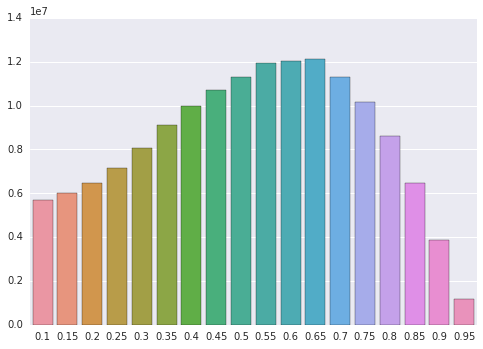

In [35]:
sns.barplot(threshold_good_loans_dict.keys(),threshold_good_loans_dict.values())


## Will need to be able to get the maximum expected profit on loans given a certain number of loans or a certain max investment

# Logistic Regression Pipeline and grid-search